In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/마케팅.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,섬세이 브랜드의 바운더리 및 팀원의 시야를 확장시킵니다 해외 신규 제휴처 확보 및 ...,25년차 학력 무관 영어 소통하는 것에 능숙하신 분 미국 시장에 대한 이해도가 높...
1,우리 스쿼드에서는 이런 비전과 목표를 가지고 있어요 강남언니 팀 마케팅 스쿼드에서...,3년 이상의 CRM 또는 타겟 마케팅 관련 경력을 보유하신 분 다양한 데이터에 기...
2,파워볼PGB게임 시장분석 및 단계별 브랜딩 전략 수립 전반 게임 광고 기획 제작 ...,필수 포트폴리오 보유자 5년 이상의 웹보드 스포츠 등 게임 또는 관련 분야의 마케...
3,올해 1월 런칭한 신용관리 서비스 크레딧플래닛 온라인투자연계금융 서비스 피플펀드...,3년 이상의 그로스 CRM 마케팅 경력 또는 그에 준하는 경험을 가지신 분 A...
4,퍼포먼스 마케터는 주로 이런 업무를 해요 Google Tiktok Meta Ad ...,이런 분과 함께하고 싶어요 퍼포먼스 마케팅UA 이외 퍼포먼스 액션 포함 경력 5년...
...,...,...
469,미소의 미션은 현실의 삶을 개선하는 기술을 만듭니다 We build technolo...,이런 분과 함께하고 싶습니다 퍼포먼스 마케팅 관련 경력 2년 이상이거나 그에 준하는...
470,그로스 마케팅 전반의 업무 마케팅 외주 협력사 핸들링 고객 퍼널별 마케팅 플랜 수...,학력 고등학교 졸업 이상 경력 2년 이상 데이터 기반 분석계획 수립개선이 가능...
471,네이버구글 등 SA 광고 운영 제품별 SA 광고 목표 및 전략 수립 제품별 SA ...,유관 경력 1년 이상 네이버구글 등의 SA 광고에서 성과를 개선한 경험이 있는 분...
472,벳칭 프로덕트 기획 및 관리 벳칭 주요 마케팅 및 영업 에셋 기획 제작서비스 소개...,계획실행확인조치PDCA 사이클와 같이 구조적인 업무 수행이 가능한 분 회사 및 제...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,25년차 학력 무관 영어 소통하는 것에 능숙하신 분 미국 시장에 대한 이해도가 높...
1,3년 이상의 CRM 또는 타겟 마케팅 관련 경력을 보유하신 분 다양한 데이터에 기...
2,필수 포트폴리오 보유자 5년 이상의 웹보드 스포츠 등 게임 또는 관련 분야의 마케...
3,3년 이상의 그로스 CRM 마케팅 경력 또는 그에 준하는 경험을 가지신 분 A...
4,이런 분과 함께하고 싶어요 퍼포먼스 마케팅UA 이외 퍼포먼스 액션 포함 경력 5년...
...,...
469,이런 분과 함께하고 싶습니다 퍼포먼스 마케팅 관련 경력 2년 이상이거나 그에 준하는...
470,학력 고등학교 졸업 이상 경력 2년 이상 데이터 기반 분석계획 수립개선이 가능...
471,유관 경력 1년 이상 네이버구글 등의 SA 광고에서 성과를 개선한 경험이 있는 분...
472,계획실행확인조치PDCA 사이클와 같이 구조적인 업무 수행이 가능한 분 회사 및 제...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/마케팅(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 25년차 학력 무관 영어 소통하는 것에 능숙하신 분 미국 시장에 대한 이해도가 높은 분 남자의 경우 병역필 또는 면제자 신용 정보 보호 및 이용에 관한 법률상에 결격 사유가 없는 분 기타 취업 규정이나 법령에서 정하는 결격 사유가 없는 분 해외에서 제품 및 서비스를 홍보 및 판매해보신 분\n 3년 이상의 CRM 또는 타겟 마케팅 관련 경력을 보유하신 분 다양한 데이터에 기반해 캠페인 가설 설정 및 검증을 스스로 할 수 있는 분 Braze 등 CRM 마케팅툴에 대한 경험이 있는 분 CRM 자동화 기획 경험이 있으신 분 개발 디자인 사업 등 협업팀과 커뮤니케이션을 유연하게 하실 수 있는 분 SQL 등을 통해 데이터를 원하는 결과물로 가공하고 인사이트를 발굴하실 수 있는 분 미용의료 비즈니스에 대한 이해도와 비전이 높은 분 Braze와 같은 마케팅 자동화 툴에 능숙하신 분포트폴리오 제출 필수 기획 제작 등 항목별 기여도 표기 필수\n 필수 포트폴리오 보유자 5년 이상의 웹보드 스포츠 등 게임 또는 관련 분야의 마케팅 경험자 콘텐츠 기획부터 제작 배포 리뷰에 이르는 과정을 주도적으로 실행하신 분 데이터 기반의 마케팅 전략 수립 실행을 경험하신 분 트렌드에 민감하고 유저중심의 사고에 익숙하신 분 우대 스타트업 업무 경험자\n  3년 이상의 그로스 CRM 마케팅 경력 또는 그에 준하는 경험을 가지신 분  App 또는 Web 마케팅 경험이 있으신 분  MMP 활용이 원활하며 데이터에 대한 명확한 정의를 바탕으로 가설에 대한 검증 과정을 설명할 수 있는 분  앱푸시 인앱메시지 등의 CRM 마케팅 기획 경험이 있으신 분  SQL 사용이 가능하신 분  핀테크금융 도메인에 대한 관심이 있는 분  Growth CRM 이외에도 퍼포먼스 SEO 등 마케팅 전반에 대한 인사이트가 있으신 분\n 이런 분과 함께하고 싶어요 퍼포먼스 마케팅UA 이외 퍼포먼스 액션 포함 경력 5년 이상을 보유하신 분 데이터 기반의 사고로 퍼포먼스 마케팅 전략을 기획수행하며 최적화 달

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '학력',
 '무관',
 '영어',
 '소통',
 '것',
 '분',
 '미국',
 '시장',
 '대한',
 '이해도',
 '분',
 '남자',
 '경우',
 '병역',
 '필',
 '면제',
 '신용',
 '정보',
 '보호',
 '및',
 '이용',
 '관',
 '법률상',
 '결격',
 '사유',
 '분',
 '기타',
 '취업',
 '규정',
 '법령',
 '정',
 '결격',
 '사유',
 '분',
 '해외',
 '제품',
 '및',
 '서비스',
 '홍보',
 '및',
 '판매',
 '분',
 '이상',
 '타겟',
 '마케팅',
 '관련',
 '경력',
 '보유',
 '분',
 '데이터',
 '기반',
 '캠페인',
 '가설',
 '설정',
 '및',
 '검증',
 '스스로',
 '수',
 '분',
 '등',
 '마케팅',
 '툴',
 '대한',
 '경험',
 '분',
 '자동화',
 '기획',
 '경험',
 '분',
 '개발',
 '디자인',
 '사업',
 '등',
 '협업',
 '팀',
 '커뮤니케이션',
 '수',
 '분',
 '등',
 '통해',
 '데이터',
 '결과물',
 '가공',
 '인사이트',
 '발굴',
 '수',
 '분',
 '미용',
 '의료',
 '비즈니스',
 '대한',
 '이해도',
 '비',
 '전이',
 '분',
 '마케팅',
 '자동화',
 '툴',
 '분',
 '포트폴리오',
 '제출',
 '필수',
 '기획',
 '제작',
 '등',
 '항',
 '목별',
 '기여',
 '표기',
 '필수',
 '필수',
 '포트폴리오',
 '보유',
 '이상',
 '웹',
 '보드',
 '스포츠',
 '등',
 '게임',
 '관련',
 '분야',
 '마케팅',
 '경험',
 '콘텐츠',
 '기획',
 '제작',
 '배포',
 '리뷰',
 '과정',
 '주도',
 '실행',
 '분',
 '데이터',
 '기반',
 '마케팅',
 '전략',
 '수립',
 '실행',
 '

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

24146
1617


FreqDist({'분': 2311, '경험': 1085, '마케팅': 743, '및': 532, '경력': 519, '이상': 411, '등': 369, '대한': 310, '보유': 286, '콘텐츠': 275, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '우대',
 '사항',
 '학력',
 '무관',
 '영어',
 '소통',
 '것',
 '미국',
 '시장',
 '남자',
 '경우',
 '병역',
 '필',
 '면제',
 '신용',
 '정보',
 '보호',
 '이용',
 '관',
 '법률상',
 '결격',
 '사유',
 '기타',
 '취업',
 '규정',
 '법령',
 '정',
 '결격',
 '사유',
 '해외',
 '제품',
 '서비스',
 '홍보',
 '판매',
 '타겟',
 '마케팅',
 '데이터',
 '기반',
 '캠페인',
 '가설',
 '설정',
 '검증',
 '스스로',
 '마케팅',
 '툴',
 '경험',
 '자동화',
 '기획',
 '경험',
 '개발',
 '디자인',
 '사업',
 '협업',
 '커뮤니케이션',
 '통해',
 '데이터',
 '결과물',
 '가공',
 '인사이트',
 '발굴',
 '미용',
 '의료',
 '비즈니스',
 '비',
 '전이',
 '마케팅',
 '자동화',
 '툴',
 '포트폴리오',
 '제출',
 '필수',
 '기획',
 '항',
 '목별',
 '기여',
 '표기',
 '필수',
 '필수',
 '포트폴리오',
 '웹',
 '보드',
 '스포츠',
 '게임',
 '분야',
 '마케팅',
 '경험',
 '콘텐츠',
 '기획',
 '배포',
 '리뷰',
 '과정',
 '주도',
 '데이터',
 '기반',
 '마케팅',
 '전략',
 '경험',
 '트렌드',
 '유저',
 '중심',
 '사고',
 '우대',
 '스타트업',
 '경험',
 '로스',
 '마케팅',
 '그',
 '준',
 '경험',
 '마케팅',
 '경험',
 '데이터',
 '정의',
 '바탕',
 '가설',
 '검증',
 '과정',
 '설명',
 '앱',
 '푸시',
 '인앱',
 '메시지',
 '마케팅',
 '기획',
 '경험',
 '사용',
 '핀',
 '테크',
 '금융',
 '도메인',
 '이외',
 '퍼포먼스',
 '마케팅',
 '전반',
 '인사이트',
 '분과',
 

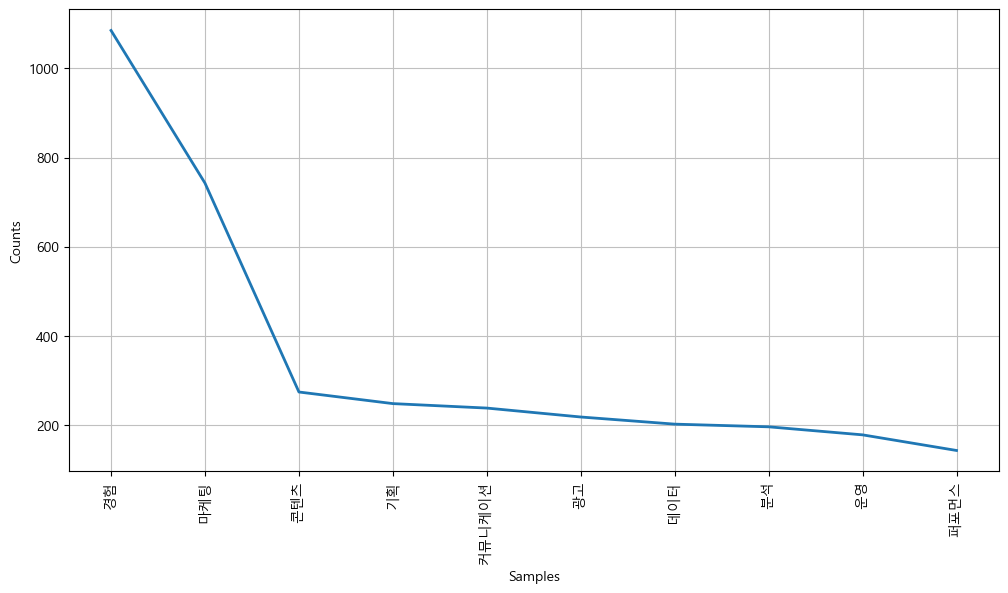

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

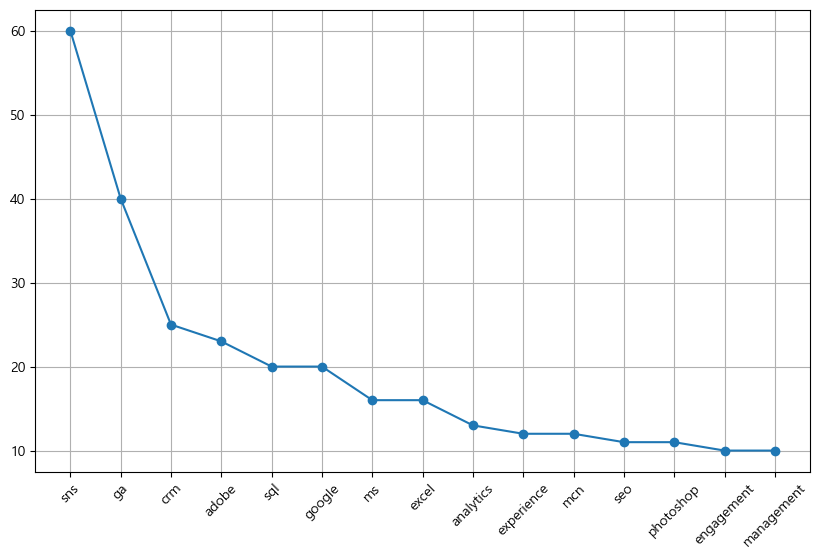

In [11]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)